# **Attrition Dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree, preprocessing, ensemble
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving general_data.csv to general_data.csv


In [ ]:
import io
attrition_train = pd.read_csv(io.BytesIO(uploaded['general_data.csv']))

In [ ]:
label_encoder = preprocessing.LabelEncoder()

to_be_encoded = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']

for feature in to_be_encoded:
  attrition_train[feature] = label_encoder.fit_transform(attrition_train[feature])


In [ ]:
attrition_train.drop(labels=['EmployeeCount','EmployeeID','Over18','StandardHours'],axis=1,inplace=True)


In [ ]:
attrition_train.dropna(axis=0,inplace=True)

In [ ]:
rf_model = ensemble.RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

features = attrition_train.drop(['Attrition'],axis=1)

rf_model.fit (X=features, y=attrition_train['Attrition'])

print (rf_model.oob_score_)


1.0


In [ ]:
for feature,imp in zip(features,rf_model.feature_importances_):
  print (feature, imp)


Age 0.0979933768188315
BusinessTravel 0.027227580925587424
Department 0.026007254612802122
DistanceFromHome 0.0700339126424627
Education 0.04057492256124106
EducationField 0.041196336553350844
Gender 0.018731742789280654
JobLevel 0.038250984020860884
JobRole 0.05611123760713036
MaritalStatus 0.039044318870786784
MonthlyIncome 0.09434842359941548
NumCompaniesWorked 0.055963861134844015
PercentSalaryHike 0.06567159848385971
StockOptionLevel 0.033671391553151624
TotalWorkingYears 0.08396531495125184
TrainingTimesLastYear 0.0449755953371164
YearsAtCompany 0.06915322411394724
YearsSinceLastPromotion 0.04300921224568984
YearsWithCurrManager 0.054069711178389504


## **Top 5 Features includes:**
1. Age - 9.8 %
2. Monthly Income - 9.4 %
3. Total Working Years - 8.4 %
4. Distance from Home - 7.0 %
5. Years at Company - 6.9 %


In [ ]:
predictors = pd.DataFrame ([attrition_train['Age'],attrition_train['MonthlyIncome'],attrition_train['TotalWorkingYears']]).T

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=6,max_leaf_nodes=10)
tree_model.fit (X=predictors, y=attrition_train['Attrition'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_model.score(X=predictors,y=attrition_train['Attrition'])

0.8578274760383386

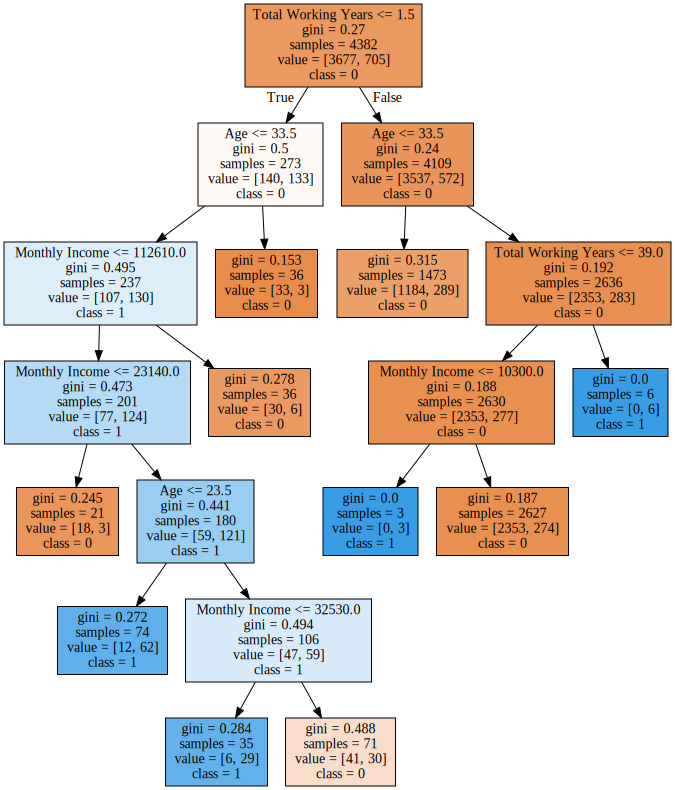

In [ ]:
graph = Source(tree.export_graphviz(tree_model, out_file=None
   , feature_names=['Age','Monthly Income','Total Working Years'], class_names=['0', '1'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

### **Rules**

1. If Total Working Years < 1.5, Age <= 33.5, Monthly Income <= 23140.0, then Attrition is No.
2. If Total Working Years < 1.5, Age <= 33.5, Monthly Income > 23140.0 and Age is <= 23.5, then Attrition is Yes.
3. If Total Working Years < 1.5, Age <= 33.5, Monthly Income > 23140.0 and Age is > 23.5 and Monthly Income is <= 32530.0, then Attrition is Yes.
4. If Total Working Years < 1.5, Age <= 33.5, Monthly Income > 23140.0 and Age is > 23.5 and Monthly Income is > 32530.0, then Attrition is No.
5. If Total Working Years > 1.5 and Age <= 33.5, then Attrition is No.
6. If Total Working Years > 1.5 and Age > 33.5, Total Working Years <= 39 and Monthly Income is <= 10300.0, then Attrition is Yes.
6. If Total Working Years > 1.5 and Age > 33.5, Total Working Years <= 39 and Monthly Income is > 10300.0, then Attrition is No.
7. If Total Working Years > 1.5 and Age > 33.5 and Total Working Years is > 39, then Attrition is Yes.
8. If Total Working Years < 1.5 and Age > 33.5, then Attrition is No.